<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/point_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Two feature classification into two classes

We have a simple task, there are two float features and two target labels.

We will use scikit-learn Python an the Multi Layer Perception estimation.

In [29]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

First we download the sample dataset

In [30]:
!wget -q https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/machine_learning/lessons/data/pre_pnt.csv

Loading, preparing and exploring sample data

In [31]:
data = np.loadtxt("pre_pnt.csv", delimiter=",")
X = data[:,0:2]                     # features
y = data[:,2].astype('int32')       # target labels
print("Sample data")
print(f"Number of samples:  {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes:  {np.unique(y).shape[0]}")
# separate training and test datasets

Sample data
Number of samples:  5000
Number of features: 2
Number of classes:  2


Dividing sample data into training and test datasets. 70% for training and 30% for testing.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Using Multi Layer Perception classifier to train the model

In [33]:
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(4,4), random_state=1)
mlp.fit(X_train, y_train)               # train the model
y_pred = mlp.predict(X_test)
print(f"test  accuracy: {accuracy_score(y_test, y_pred):.1%}")
y_train_pred = mlp.predict(X_train)
print("confusion matrix test")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(f"train accuracy: {accuracy_score(y_train, y_train_pred):.1%}")
print("confusion matrix train")
print(confusion_matrix(y_true=y_train, y_pred=y_train_pred))

test  accuracy: 81.4%
confusion matrix test
[[1221    0]
 [ 279    0]]
train accuracy: 82.6%
confusion matrix train
[[2892    0]
 [ 608    0]]


Something strange happend. All points are put into the first class by our modell (second column of the confusion matrix contains only zeros).

Let's check the number of the members of the target classes.



In [34]:
number_of_samples = y.shape[0]
target_true = np.sum(y)
print("Full dataset")
print(f"Number of members class 0 : {number_of_samples - target_true:4d} {(number_of_samples - target_true) / number_of_samples:.1%}")
print(f"Number of members class 1 : {target_true:4d} {target_true / number_of_samples:.1%}")
number_of_samples = y_train.shape[0]
target_true = np.sum(y_train)
print("Training dataset")
print(f"Number of members class 0 : {number_of_samples - target_true:4d} {(number_of_samples - target_true) / number_of_samples:.1%}")
print(f"Number of members class 1 : {target_true:4d} {target_true / number_of_samples:.1%}")
number_of_samples = y_test.shape[0]
target_true = np.sum(y_test)
print("Test dataset")
print(f"Number of members class 0 : {number_of_samples - target_true:4d} {(number_of_samples - target_true) / number_of_samples:.1%}")
print(f"Number of members class 1 : {target_true:4d} {target_true / number_of_samples:.1%}")

Full dataset
Number of members class 0 : 4113 82.3%
Number of members class 1 :  887 17.7%
Training dataset
Number of members class 0 : 2892 82.6%
Number of members class 1 :  608 17.4%
Test dataset
Number of members class 0 : 1221 81.4%
Number of members class 1 :  279 18.6%


We can see the ratio in the test and train dataset are the same as in the whole dataset. So the train and test datasets represent well the data.

Feature values should be in similar ranges for supervised learning.
Let's check the range of features!

In [35]:
print(f"Feature 1 range: {np.min(X_train[:,0]):.0f}, {np.max(X_train[:,0]):.0f}")
print(f"Feature 2 range: {np.min(X_train[:,1]):.0f}, {np.max(X_train[:,1]):.0f}")

Feature 1 range: 534390, 667891
Feature 2 range: 202941, 297543


Let's standardize features (mean value zero and mean error 1) and train the model again.

In [36]:
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(f"Feature 1 range: {np.min(X_train_std[:,0]):.2f}, {np.max(X_train_std[:,0]):.2f}")
print(f"Feature 2 range: {np.min(X_train_std[:,1]):.2f}, {np.max(X_train_std[:,1]):.2f}")

Feature 1 range: -1.74, 1.73
Feature 2 range: -1.74, 1.72


Let's train the model again with the scaled train data and test them with scaled test data.

In [37]:
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(4,4), random_state=1)
mlp.fit(X_train_std, y_train)
y_pred = mlp.predict(X_test_std)
print(f"test  accuracy: {accuracy_score(y_test, y_pred):.1%}")
y_train_pred = mlp.predict(X_train_std)
print("confusion matrix test")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(f"train accuracy: {accuracy_score(y_train, y_train_pred):.1%}")
print("confusion matrix train")
print(confusion_matrix(y_true=y_train, y_pred=y_train_pred))

test  accuracy: 96.0%
confusion matrix test
[[1187   34]
 [  26  253]]
train accuracy: 97.5%
confusion matrix train
[[2855   37]
 [  50  558]]


Results are much better after scaling the data. We get 1187 true negativ, 253 true positive, 26 false negativ and 34 false positive results from the test data set. The rations are similar in train dataset.

Let's visualize the results!

Text(0.5, 1.0, 'Train dataset')

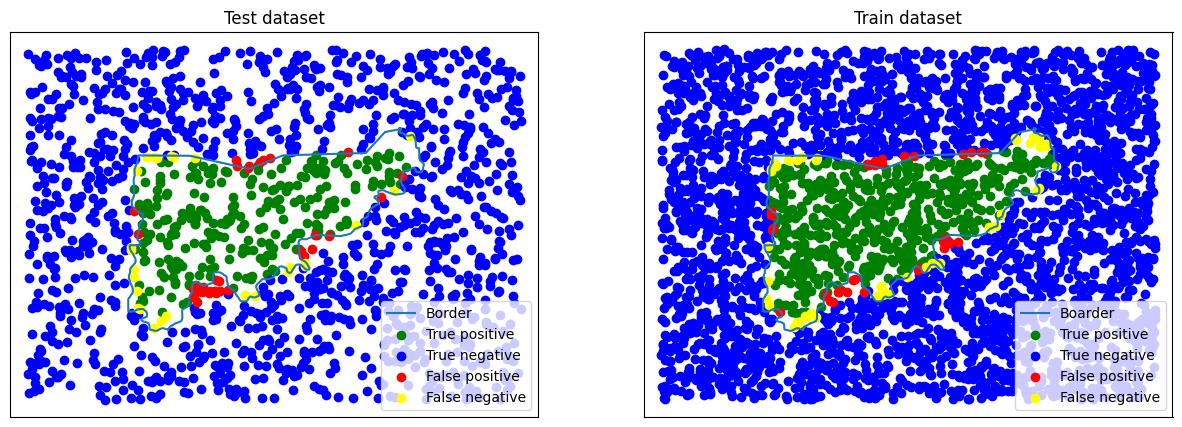

In [38]:
!wget -q https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/machine_learning/lessons/data/border.csv
border = np.loadtxt("border.csv", delimiter=" ")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# test dataset
w = np.hstack((X_test, y_test.reshape(-1,1), y_pred.reshape(-1,1)))
# false positive
f_p = w[(w[:,2] == 0) & (w[:,3] == 1)]
# false negative
f_n = w[(w[:,2] == 1) & (w[:,3] == 0)]
# true positive
t_p = w[(w[:,2] == 1) & (w[:,3] == 1)]
# true negative
t_n = w[(w[:,2] == 0) & (w[:,3] == 0)]
ax[0].plot(border[:,0], border[:,1], label="Border")
ax[0].scatter(t_p[:,0], t_p[:,1], c='green', label="True positive")
ax[0].scatter(t_n[:,0], t_n[:,1], c='blue', label="True negative")
ax[0].scatter(f_p[:,0], f_p[:,1], c='red', label="False positive")
ax[0].scatter(f_n[:,0], f_n[:,1], c='yellow', label="False negative")
ax[0].legend(loc=4)
ax[0].axis('equal')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Test dataset")
# train dataset
w = np.hstack((X_train, y_train.reshape(-1,1), y_train_pred.reshape(-1,1)))
# false positive
f_p = w[(w[:,2] == 0) & (w[:,3] == 1)]
# false negative
f_n = w[(w[:,2] == 1) & (w[:,3] == 0)]
# true positive
t_p = w[(w[:,2] == 1) & (w[:,3] == 1)]
# true negative
t_n = w[(w[:,2] == 0) & (w[:,3] == 0)]
ax[1].plot(border[:,0], border[:,1], label="Boarder")
ax[1].scatter(t_p[:,0], t_p[:,1], c='green', label="True positive")
ax[1].scatter(t_n[:,0], t_n[:,1], c='blue', label="True negative")
ax[1].scatter(f_p[:,0], f_p[:,1], c='red', label="False positive")
ax[1].scatter(f_n[:,0], f_n[:,1], c='yellow', label="False negative")
ax[1].legend(loc=4)
ax[1].axis('equal')
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Train dataset")

From the figure you can realize we solved the point in polygon problem ;-).

Let's put together scaling and MLP into a pipeline and save the model to use it it with data we havn't seen yet.

In [39]:
steps = [
    ("standard_scaler", StandardScaler()),
    ("mlp", MLPClassifier(max_iter=2000, hidden_layer_sizes=(4,4))),
]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(f"test  accuracy: {accuracy_score(y_test, y_pred):.1%}")
print("confusion matrix test")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

test  accuracy: 95.8%
confusion matrix test
[[1186   35]
 [  28  251]]


Saving the trained model to use it without repeating training step.

In [40]:
with open("model.sci", "wb") as f:
    pickle.dump(pipe, f)

Loading and using the trained model.




In [41]:
with open("model.sci", "rb") as f:
    my_model = pickle.load(f)

Generating new, unlabelled data and applying the loaded model.

In [42]:
feat = np.random.rand(1000, 2) * (np.max(X, axis=0) - np.min(X, axis=0)) + np.min(X, axis=0)
y_feat = my_model.predict(feat)

Let's check visualy the result.

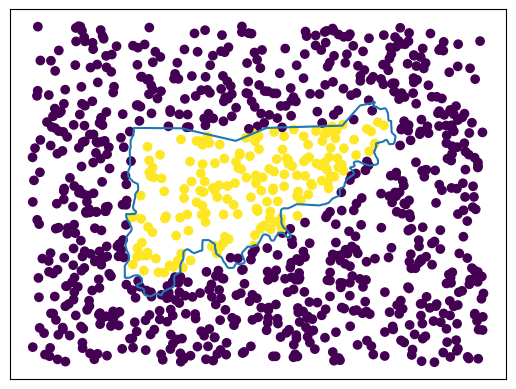

In [43]:
plt.plot(border[:,0], border[:,1], label="Border")
plt.scatter(feat[:,0], feat[:,1], c=y_feat)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)